In [13]:
import chainer
from chainer import Variable
from chainer import Chain
import chainer.functions as F
import chainer.links as L

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

['NOOP', 'FIRE', 'RIGHT', 'LEFT']


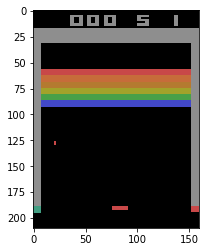

In [2]:
import gym


class RandomAgent(object):
    """The world's simplest agent!"""
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

env = gym.make('Breakout-v0')
print(env.unwrapped.get_action_meanings())

n_iter = 5
agent = RandomAgent(env.action_space)
obs = env.reset()  # reset environment and agent
reward = None
done = False
R = []

for step in range(n_iter):
    plt.imshow(env.render(mode='rgb_array'))
    action = agent.act(obs, reward, done)
    _obs, reward, done, _ = env.step(action)
    obs = _obs
    R.append(reward)

In [12]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.low[0][0])
print(env.observation_space.high[0][0])

Discrete(4)
Box(210, 160, 3)
[0 0 0]
[255 255 255]


In [ ]:
def ActorCritic(chainer.Chain):
    
    def __init__(self):
        pass
    
    def __call__(self, x):
        pass
        return pi_out, v_out


In [5]:
obs_shape = (2,3)
a = np.zeros([2 + 1, 5] + list(obs_shape))
a.shape

(3, 5, 2, 3)

In [ ]:
def A2CAgent():
    
    def __init__(model, n_steps):
        
        self.model = model
        self.step = 0
        self.n_steps = n_steps
    
    def _compute_reward(self):
      
    def _compute_returns(self, next_value):  # ?
        self.returns[-1] = next_value
        for i in reversed(range(self.update_steps)):
            self.returns[i] = self.rewards[i] + \
                self.gamma * self.returns[i + 1] * self.masks[i]
    
    def _reset_storage(self):
        
#         self.states = self.xp.zeros(
#             [self.update_steps + 1, self.num_processes] + list(obs_shape),
#             dtype='f')
#         self.actions = self.xp.zeros(
#             [self.update_steps, self.num_processes] + list(action_shape),
#             dtype=action.dtype)
#         self.rewards = self.xp.zeros(
#             (self.update_steps, self.num_processes, 1), dtype='f')
#         self.value_preds = self.xp.zeros(
#             (self.update_steps + 1, self.num_processes, 1), dtype='f')
#         self.returns = self.xp.zeros(
#             (self.update_steps + 1, self.num_processes, 1), dtype='f')

        self.states = []
        self.actions = []
        self.rewards = []
        self.value_preds = []
        self.returns = []
    
    def update(self):
        pass
    
    def act_and_train(self, state, reward, done):
        
#         statevar = self.batch_states([state], self.xp, self.phi)[0]
        
        if self.steps == 0:
#             pout, _ = self.model.pi_and_v(statevar[0:1])
#             action = pout.sample().data
            self._reset_storage()
        
#         self.rewards[self.t - self.t_start -1] \
#             = self.xp.array(reward, dtype=self.xp.float32)
#         self.states[self.t - self.t_start] = statevar
        self.states.append(state)
        self.rewards.append(reward)

        if self_step % n_steps == 0:
            self.update()
            
        p_out, value = self.model(state)
        action = p_out.sample().data    
        
#         self.actions[self.t - self.t_start] \
#             = action.reshape([-1] + list(self.action_shape))
#         self.value_preds[self.t - self.t_start] = value.data
        self.actions.append(action) 
        self.value_preds[self.t - self.t_start] = value.data     

        self.steps += 1
            
        return action
    
    def act(self, obs):
        pass

In [ ]:
class QFunction(chainer.Chain):

    def __init__(self, obs_size, n_actions, n_hidden_channels=50):
        super().__init__()
        with self.init_scope():
            self.l0 = L.Linear(obs_size, n_hidden_channels)
            self.l1 = L.Linear(n_hidden_channels, n_hidden_channels)
            self.l2 = L.Linear(n_hidden_channels, n_actions)

    def __call__(self, x, test=False):
        """
        Args:
            x (ndarray or chainer.Variable): An observation
            test (bool): a flag indicating whether it is in test mode
        """
        h = F.tanh(self.l0(x))
        h = F.tanh(self.l1(h))
        return chainerrl.action_value.DiscreteActionValue(self.l2(h))

obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n
q_func = QFunction(obs_size, n_actions)

In [ ]:
import chainer 
import chainer.functions as F
import chainer.links as L
import chainerrl
import gym
import numpy as np

from chainer import cuda

import datetime
from skimage.color import rgb2gray
from skimage.transform import resize

env = gym.make('Breakout-v0')
obs = env.reset()

print("observation space   : {}".format(env.observation_space))
print("action space        : {}".format(env.action_space))

action = env.action_space.sample()
obs, r, done, info = env.step(action)
class QFunction(chainer.Chain):
def __init__(self,obs_size, n_action):
    super(QFunction, self).__init__(
        l1=L.Convolution2D(obs_size, 4, ksize=2,pad=1),#210x160
        bn1=L.BatchNormalization(4),
        l2=L.Convolution2D(4, 4, ksize=2,pad=1),#105x80
        bn2=L.BatchNormalization(4),
        #l3=L.Convolution2D(64, 64, ksize=2, pad=1),#100x100
        #bn3=L.BatchNormalization(64),
        #l4=L.Convolution2D(64, 3, ksize=2,pad=1),#50x50
       # bn4=L.BatchNormalization(3),

        l5=L.Linear(972, 512),
        out=L.Linear(512, n_action, initialW=np.zeros((n_action, 512), dtype=np.float32))
    )

def __call__(self, x, test=False):

    h1=F.relu(self.bn1(self.l1(x)))
    h2=F.max_pooling_2d(F.relu(self.bn2(self.l2(h1))),2)
    #h3=F.relu(self.bn3(self.l3(h2)))
    #h4=F.max_pooling_2d(F.relu(self.bn4(self.l4(h3))),2)
    #print h4.shape

    return chainerrl.action_value.DiscreteActionValue(self.out(self.l5(h2)))

n_action = env.action_space.n
obs_size = env.observation_space.shape[0] #(210,160,3)
q_func = QFunction(obs_size, n_action)

optimizer = chainer.optimizers.Adam(eps=1e-2)
optimizer.setup(q_func)

gamma = 0.99

explorer = chainerrl.explorers.ConstantEpsilonGreedy(
epsilon=0.2, random_action_func=env.action_space.sample)

replay_buffer = chainerrl.replay_buffer.ReplayBuffer(capacity=10 ** 6)

phi = lambda x: x.astype(np.float32, copy=False)
agent = chainerrl.agents.DoubleDQN(
q_func, optimizer, replay_buffer, gamma, explorer,
minibatch_size=4, replay_start_size=100, update_interval=10,
target_update_interval=10, phi=phi)

last_time = datetime.datetime.now()
n_episodes = 10000
for i in range(1, n_episodes + 1):
obs = env.reset()

reward = 0
done = False
R = 0

while not done:
    env.render()
    action = agent.act_and_train(obs, reward)
    obs, reward, done, _ = env.step(action)


    if reward != 0:
        R += reward

elapsed_time = datetime.datetime.now() - last_time
print('episode:', i, 
      'reward:', R,
     )
last_time = datetime.datetime.now()

if i % 100 == 0:
    filename = 'agent_Breakout' + str(i)
    agent.save(filename)

agent.stop_episode_and_train(obs, reward, done)
print('Finished.')

Layer freezing.

In [29]:
class CNN(chainer.Chain):
    
    def __init__(self, train=True):
        super(CNN, self).__init__(
            conv1 = L.Convolution2D(1, 1, 1, initialW=np.array([[[[1]]]])) ,
            l1 = L.Linear(None, 1, initialW=np.array([[1,1,1,1]]))  
        )

    def __call__(self, x):
        h = F.relu(self.conv1(x))
        h = F.sigmoid(self.l1(h))
        return h


net = CNN()
net.cleargrads()
optimizer = chainer.optimizers.SGD()
optimizer.setup(net)

optimizer.setup(net)
net.conv1.W.update_rule.enabled = False
# net.conv1.disable_update()  # also works

result = net(np.random.random((1,1,2,2)).astype(np.float32))
print("conv1 weights:",net.conv1.W.data)
print("l1 weigths:",net.l1.W.data)
loss = F.mean_absolute_error(result,np.array([[0.1]],dtype=np.float32))
loss.backward()
optimizer.update()
print("conv1 grad",net.conv1.W.grad)
print("after update...")
print("conv1 weights:",net.conv1.W.data)
print("l1 weights:",net.l1.W.data)

conv1 weights: [[[[ 1.]]]]
l1 weigths: [[ 1.  1.  1.  1.]]
conv1 grad [[[[ 0.19457532]]]]
after update...
conv1 weights: [[[[ 1.]]]]
l1 weights: [[ 0.99955279  0.99984294  0.99892896  0.99972951]]
